# Case 3: Statistical Models (Holt Winters)

There are many statistical models which are pretty good at performing time series analysis. Some of these methods are faster than machine learning models with good performance.

Holt winters is a statistical model which uses ideas from weightes averages and exponential smoothing.

In simple terms, a time series data is composed of levels, trends, seasonality and noise as its parts which can be present in any proportion. We can assume the relation of the 4 parts of time series could be additive w.r.t level and trend and multiplicative w.r.t seasonality. 

We estimate the initial values for these parts and then use a recursive equation to calculate the future values and thus perform a forecast.

Reference: https://towardsdatascience.com/holt-winters-exponential-smoothing-d703072c0572

In [2]:
# importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# loading data using pandas

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [4]:
def datetime(df):
  '''
  Method to convert the date column which 
  would be easily understood by pandas
  '''
  df.date = pd.to_datetime(df.date).values
  temp = df.set_index('date', drop=True)

  return temp

train = datetime(train)
test = datetime(test)

# Model 

The model can be easily used with the help of *statsmodels* python library.
We perform the experiments in 3 ways:
1. Daily predictions
2. Weekly predictions
3. Monthly predictions

We assume the trend and level have additive relation and seasonality has multiplicative relation.

In [5]:
def holt_winter_model(df,freq):

  train = df.resample(freq).sum().drop(['store','item'],axis=1)
  
  if freq == 'D':
    seasonal_period = 365
  elif freq == 'W':
    seasonal_period = 52
  elif freq == 'M':
    seasonal_period = 12

  train_df = train.iloc[:-seasonal_period]
  valid_df = train.iloc[-seasonal_period:]

  model = HWES(train_df, seasonal_periods=seasonal_period, trend='add', seasonal='mul')
  fitted = model.fit()

  sales_forecast = fitted.forecast(steps=seasonal_period)

  fig = plt.figure(figsize=(15,5))
  fig.suptitle('Forecast of aggregate sales for validation data')
  future, = plt.plot(valid_df.index, valid_df, 'r.-', label='Actual Sales')
  predicted_future, = plt.plot(valid_df.index, sales_forecast, 'g.-', label='Sales Forecast')
  plt.legend(handles=[ future, predicted_future])
  #plt.savefig( 'images/statmodel.jpg', bbox_inches='tight', dpi=200)

  print('MAE: ',mean_absolute_error(sales_forecast, valid_df))
  print('RMSE: ',sqrt(mean_squared_error(sales_forecast, valid_df)))
  print('R2: ',r2_score(sales_forecast, valid_df))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


MAE:  3003.8709907170087
RMSE:  4538.309478185753
R2:  0.443092195146946


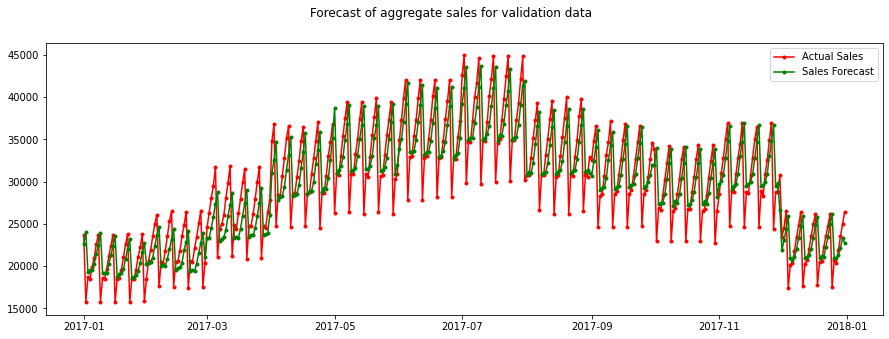

In [6]:
# Daily aggregate

holt_winter_model(train,'D')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


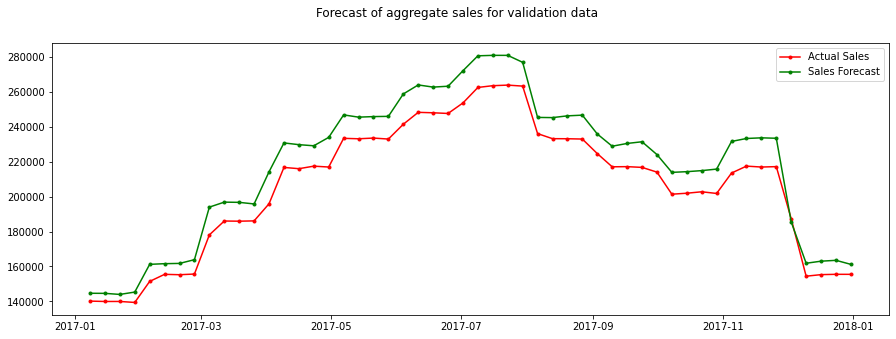

MAE:  12098.580568172225
RMSE:  12804.851831292413
R2:  0.8989985512054893


In [ ]:
# Weekly aggregate

holt_winter_model(train,'W')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


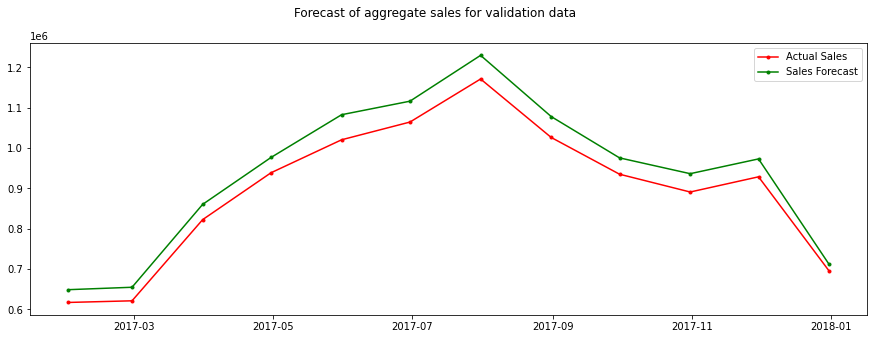

MAE:  42672.867932151516
RMSE:  44356.13570538118
R2:  0.9383320886014956


In [ ]:
# Monthly aggregate

holt_winter_model(train,'M')